In [19]:
import pandas as pd
import numpy as np
from Utils.common.custerReadFile import read_multi_csv
from Pic.maxent_style import maxent_style
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm,t,f,betaprime,logistic,exponpow,foldnorm,poisson
import matplotlib.dates as mdates
from scipy.optimize import curve_fit
from scipy.misc import factorial

In [5]:
path = "/Users/chaoxu/code/local-spark/Data/jiufu/risk_feature_csv"

In [6]:
df = read_multi_csv(path=path)

In [7]:
df = df.sort_values(by="timestamp")

In [8]:
df.shape

(124687, 13)

In [9]:
df.loc[df.mobile == ""].shape

(0, 13)

In [10]:
# df["timestamp"] = pd.to_datetime(df['timestamp'], unit='ms', utc=True)

In [11]:
# df = df.set_index("timestamp")

In [12]:
df.head()

,city,ckid,country,country_code,ip,is_cracked,is_proxy,is_simulator,mobile,province,timestamp,type,ua_mismatch
50772,UNKNOWN,2b4f740bbb771887,中国,CHN,222.217.87.58,False,UNKNOWN,True,91B45FC63F64B5608C888DBE64169CBC,广西壮族自治区,1507593638555,active,False
50773,沧州市,f22385332947db2,中国,CHN,61.55.93.154,False,UNKNOWN,True,EF9222ACD314E3D8304CDDB8246010EB,河北省,1507593640267,active,False
50774,广州市,be20d1a61a8cf007,中国,CHN,14.30.180.124,False,UNKNOWN,True,5A59D09206C4FF9BEF9AA221829DD345,广东省,1507593641620,active,False
50775,安阳市,8a4ea592305e7f62,中国,CHN,182.124.79.68,False,UNKNOWN,True,3F7DFC70844CAAED0B9C848E0C75E92F,河南省,1507593644036,active,False
50776,梧州市,b3c2a85a80af4d4b,中国,CHN,125.73.102.27,False,UNKNOWN,True,A80E97AFCAD4E64BB9096EFEF9BA0D25,广西壮族自治区,1507593656463,active,False


In [13]:
df.mobile.drop_duplicates().count()

39702

In [14]:
df.groupby('mobile').agg({"ckid":"count"}).reset_index()

,mobile,ckid
0,00012FD4E55B5A8876D11A0148F21D04,2
1,00019DA90A8D1518949DE693DE948116,7
2,00022BF496079DFC7C84BDA6D8B81B4E,4
3,00045072AC44A47B63D3BA70DD199254,1
4,000728351D19C36721E35846CAD934A6,1
5,00088F791F304F9A97A6B99FF5ABA984,1
6,00092FF5F6938FEFFBE981A36C40EAB8,1
7,00099AD98E786437801FB2384E86D050,1
8,000F4C307CDD3695232E9BB101D678CC,6
9,00120463BB446E206F5C6E0FFDD09276,1


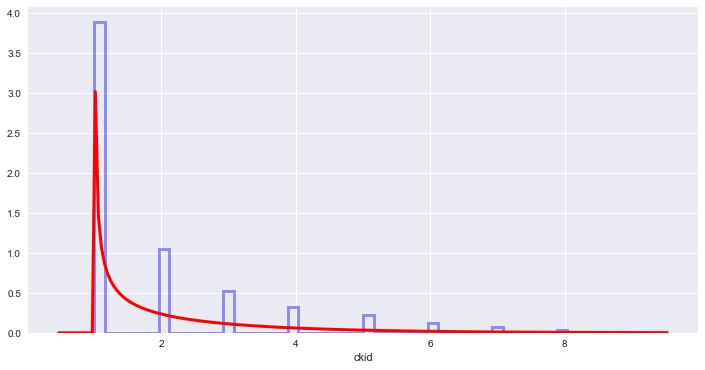

In [15]:
df1 = df.loc[df['ckid'].notnull()]
df1 = df1.groupby("mobile").agg({"ckid":'nunique'}).reset_index()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
# risk_fit = [norm, logistic]
# risk_fit_name = ['norm', 'logistic']
sns.distplot(ax=ax,a=df1["ckid"], color="blue", hist_kws={"histtype": "step", "linewidth": 3},
             fit=exponpow,
             norm_hist=True,
             hist=True,
             kde=False,
             fit_kws={"color":'r', "lw": 3, "label": "normal"})
plt.show(block=False)

In [ ]:
df1 = df.groupby("ckid").agg({"mobile":'count'}).reset_index()
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
# risk_fit = [norm, logistic]
# risk_fit_name = ['norm', 'logistic']
sns.distplot(ax=ax,a=df1["mobile"],color="blue", hist_kws={"histtype": "step", "linewidth": 3},
             fit=norm,
             fit_kws={"color":'r', "lw": 3, "label": "normal"},
             kde=True,
             kde_kws={"color": "y", "lw": 3, "label": "KDE"})
plt.show(block=False)

In [ ]:
df2=df.groupby(['mobile','ckid']).agg({
        "timestamp":["max",'min']})

In [ ]:
df2.columns = ["_".join(x) for x in df2.columns.ravel()]

In [ ]:
df2

In [ ]:
df2=df2.reset_index()

In [ ]:
# df2["timestamp_max"] = pd.to_datetime(df2['timestamp_max'], unit='ms', utc=True)
# df2["timestamp_min"] = pd.to_datetime(df2['timestamp_min'], unit='ms', utc=True)

In [ ]:
# df2['delta']=df2.timestamp_max.subtract(df2.timestamp_min)
df2['delta']=df2.timestamp_max - df2.timestamp_min

In [ ]:
df2.head()

In [ ]:
df2 = df2.sort_values(by="timestamp_max")

In [ ]:
# df2.delta.astype('timedelta64[h]')

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
sns.distplot(ax=ax,a=df2["delta"],color="blue", hist_kws={"histtype": "step", "linewidth": 3},
             fit=norm,
             fit_kws={"color":'r', "lw": 3, "label": "normal"},
             kde=True,
             kde_kws={"color": "y", "lw": 3, "label": "KDE"})
plt.show(block=False)

In [ ]:
def get_delta(row):
    _delta = 0
    ckids = list(row['ckid'])
    time_min = list(row['timestamp_min'])
    time_max = list(row['timestamp_max'])
    for i in xrange(len(ckids) - 1):
        pre_time, next_time = time_max[i], time_min[i + 1]
        _delta += next_time - pre_time
    _del_mean = _delta / len(ckids)
    return _del_mean

In [ ]:
df3 =df2.groupby("mobile").apply(lambda x: get_delta(x)).reset_index(name='del')

In [ ]:
df3['del'] = df3['del'] / 1000 / 60

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
# xfmt = mdates.DateFormatter('%H:%M:%S')
# ax.xaxis.set_major_formatter(xfmt)
# # automatically rotates the tick labels
# fig.autofmt_xdate()
sns.distplot(ax=ax,a=df3["del"],color="blue", hist_kws={"histtype": "step", "linewidth": 3},
             fit=norm,
             fit_kws={"color":'r', "lw": 3, "label": "normal"},
             kde=True,
             kde_kws={"color": "y", "lw": 3, "label": "KDE"})
plt.show(block=False)

In [ ]:
df3.loc[df3['del'] < 0]

In [ ]:
df.loc[df.mobile == "0DFE50736C65567F7332B2FD61780BBC"]

In [ ]:
df2.loc[df2.mobile == "00012FD4E55B5A8876D11A0148F21D04"]

In [ ]:
df.loc[df.mobile == "00012FD4E55B5A8876D11A0148F21D04"]

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 1, 1)
# automatically rotates the tick labels
fig.autofmt_xdate()
ax=sns.distplot(ax=ax,a= df3.loc[df3["del"] < 0]['del'],color="blue", hist_kws={"histtype": "step", "linewidth": 3},
             fit=norm,
             fit_kws={"color":'r', "lw": 3, "label": "normal"},
             kde=True,
             kde_kws={"color": "y", "lw": 3, "label": "KDE"})
plt.show()

In [ ]:
df4 = df.copy()

In [ ]:
df4["timestamp"] = pd.to_datetime(df4['timestamp'], unit='ms', utc=True)

In [ ]:
df4 = df4.set_index("timestamp")

In [ ]:
grouper=df4.groupby([pd.TimeGrouper('W')])

In [ ]:
a=grouper['ip'].count()

In [ ]:
a.values.shape

In [ ]:
def makeFeatureCorrTimeHist(cor_cols, df, resample_ratio="W", dpi=600, path=None):
    """
    this function used to draw two or more
    :param gcol:
    :param tcol:
    :param df:
    :param resample_ratio:
    :param dpi:
    :param title:
    :param path:
    :param palette:
    :return:
    """
    df = df.copy()
    df["timestamp"] = pd.to_datetime(df['timestamp'], unit='ms', utc=True)
    df = df.set_index("timestamp")
    grouper = df.groupby([pd.TimeGrouper(resample_ratio)])
    df1 = pd.DataFrame()
    df1[cor_cols[0]] = grouper[cor_cols[0]].count().values
    df1[cor_cols[1]] = grouper[cor_cols[1]].count().values
    xlim = (df1[cor_cols[0]].min() * 0.8, df1[cor_cols[0]].max() * 1.2)
    ylim = (df1[cor_cols[1]].min() * 0.8 , df1[cor_cols[1]].max() * 1.2)
    grid = sns.jointplot(x=cor_cols[0], y=cor_cols[1], data=df1, kind="reg", xlim=xlim, ylim=ylim,
                         color='r', size=12);
    plt.show(block=False)

In [ ]:
makeFeatureCorrTimeHist(cor_cols=['ckid', 'ip'], df=df)

In [ ]:
def makeFeatureCorrTimeHist1(cor_cols, df, gcol, resample_ratio="W", dpi=600, path=None):
    """
    this function used to draw two or more
    :param gcol:
    :param tcol:
    :param df:
    :param resample_ratio:
    :param dpi:
    :param title:
    :param path:
    :param palette:
    :return:
    """
    df = df.copy()
    df["timestamp"] = pd.to_datetime(df['timestamp'], unit='ms', utc=True)
    df = df.set_index("timestamp")
    grouper = df.groupby([pd.TimeGrouper(resample_ratio), gcol])
    df1 = pd.DataFrame()
    df1[cor_cols[0]] = grouper[cor_cols[0]].count().values
    df1[cor_cols[1]] = grouper[cor_cols[1]].count().values
    xlim = (df1[cor_cols[0]].min() * 0.8, df1[cor_cols[0]].max() * 1.2)
    ylim = (df1[cor_cols[1]].min() * 0.8 , df1[cor_cols[1]].max() * 1.2)
    print "corr is {0}".format(df1[cor_cols[1]].corr(df1[cor_cols[0]]))
    grid = sns.jointplot(x=cor_cols[0], y=cor_cols[1], data=df1, kind="reg", xlim=xlim, ylim=ylim,
                         color='r', size=12);
    plt.show(block=False)

In [ ]:
makeFeatureCorrTimeHist1(cor_cols=['ckid', 'ip'], df=df, gcol='mobile')

In [ ]:
def makeFeatureCorrTimeHist2(cor_cols, df, gcol, resample_ratio="W", dpi=600, path=None):
    """
    this function used to draw two or more
    :param gcol:
    :param tcol:
    :param df:
    :param resample_ratio:
    :param dpi:
    :param title:
    :param path:
    :param palette:
    :return:
    """
    df = df.copy()
    df["timestamp"] = pd.to_datetime(df['timestamp'], unit='ms', utc=True)
    df = df.set_index("timestamp")
    groups = []
    if gcol:
        groups.append(gcol)
    if resample_ratio:
        groups.append(pd.TimeGrouper(resample_ratio))
    grouper = df.groupby(groups)
    df1 = pd.DataFrame()
    df1[cor_cols[0]] = grouper[cor_cols[0]].count().values
    df1[cor_cols[1]] = grouper[cor_cols[1]].count().values
    xlim = (df1[cor_cols[0]].min() * 0.8, df1[cor_cols[0]].max() * 1.2)
    ylim = (df1[cor_cols[1]].min() * 0.8 , df1[cor_cols[1]].max() * 1.2)
    print "corr is {0}".format(df1[cor_cols[1]].corr(df1[cor_cols[0]]))
    grid = sns.jointplot(x=cor_cols[0], y=cor_cols[1], data=df1, kind="reg", xlim=xlim, ylim=ylim,
                         color='r', size=12);
    plt.show(block=False)

In [ ]:
def makeCitySwitchTimeHist(df, gcol=None, time_scope=[20,60], dpi=600, path=None, palette=None):
    """
    this function used to get the ratio and number change two faste from scols
    first: do group by gcol
    second: analysis scols switch to new use time less than time_scope, get the number and ratio
    third: pic a picture, analysis the distribution and correlation
    :param scols:
    :param df:
    :param gcol:
    :param time_scope:
    :param dpi:
    :param path:
    :param palette:
    :return:
    """
    df = df.copy()
    df = df.sort_values(by="timestamp")

    def get_switch_over(row):
        switch_quick_num = 0
        province = list(row['province'])
        city = list(row['city'])
        time_stamp = list(row['timestamp'])
        for i in xrange(len(time_stamp) - 1):
            pre_province, next_province = province[i], province[i + 1]
            pre_city, next_city = city[i], city[i + 1]
            pre_time, next_time = time_stamp[i], time_stamp[i + 1]
            time_delta = (next_time - pre_time) / 1000 / 60
            if pre_province == next_province:
                if pre_city != next_city and time_delta <= time_scope[0]:
                    switch_quick_num += 1
            else:
                if pre_city != next_city and time_delta <= time_scope[1]:
                    switch_quick_num += 1
        return switch_quick_num
    df_switch = df.groupby(gcol).apply(lambda x: get_switch_over(x)).reset_index(name='switch')
    df_city = df.groupby(gcol).agg({'city':'count'}).reset_index()
    df1 = pd.merge(df_switch,df_city,on=gcol)
    df1['ratio'] = df1['switch'] / df1['city']
    xlim = (df1['switch'].min() * 0.8, df1['switch'].max() * 1.1)
    ylim = (df1['ratio'].min() * 0.8 , df1['ratio'].max() * 1.1)
    grid = sns.jointplot(x='switch', y='ratio', data=df1, kind="reg", xlim=xlim, ylim=ylim,
                         color="blue", size=12);
    plt.show(block=False)

In [ ]:
makeCitySwitchTimeHist(df=df, gcol='ckid')

In [ ]:
def makeEventSwitchHist(df, gcol,dpi=600, path=None, palette=None):
    """
    this function used to analysis the num and ratio of event type different and ckid change, too
    first: group by gcol
    sencond: get the number and ratio while event type is not same from pre and cur and ckid is difference, too
    :param df:
    :param gcol:
    :param time_scope:
    :param dpi:
    :param path:
    :param palette:
    :return:
    """
    df = df.copy()
    df = df.sort_values(by="timestamp")

    def get_switch_event_ckid_same(row,same=True):
        switch_evnet_num = 0
        type_ = list(row['type'])
        ckid = list(row['ckid'])
        time_stamp = list(row['timestamp'])
        for i in xrange(len(time_stamp) - 1):
            pre_type, next_type = type_[i], type_[i + 1]
            pre_ckid, next_ckid = ckid[i], ckid[i + 1]
            if same and pre_type != next_type and pre_ckid != next_ckid:
                switch_evnet_num +=1
            elif pre_type == next_type and pre_ckid != next_ckid:
                switch_evnet_num +=1
        return switch_evnet_num
    df_same = df.groupby(gcol).apply(lambda x: get_switch_event_ckid_same(x)).reset_index(name='same')
    df_not_same = df.groupby(gcol).apply(lambda x: get_switch_event_ckid_same(x, False)).reset_index(name='not_same')
    df_dev = df.groupby(gcol).agg({'ckid':'count'}).reset_index()
    df_dev = df_dev.loc[df_dev.ckid != 0]
    df1 = df_same.merge(df_not_same, on=gcol).merge(df_dev, on=gcol)
    df1['same_ratio'] = df1['same'] / df1['ckid']
    df1['not_same_ratio'] = df1['not_same'] / df1['ckid']
    df1 = df1.fillna(0)
    xlim1 = (df1['same'].min() * 0.8, df1['same'].max() * 1.1)
    ylim1 = (df1['same_ratio'].min() * 0.8 , df1['same_ratio'].max() * 1.1)
    color_ = "blue"
    grid1 = sns.jointplot(x='same', y='same_ratio', data=df1, kind="reg", xlim=xlim1, ylim=ylim1,
                         color=color_,size=6);
    xlim2 = (df1['not_same'].min() * 0.8, df1['not_same'].max() * 1.1)
    ylim2 = (df1['not_same_ratio'].min() * 0.8 , df1['not_same_ratio'].max() * 1.1)
    grid2 = sns.jointplot(x='not_same', y='not_same_ratio', data=df1, kind="reg", xlim=xlim2, ylim=ylim2,
                         color=color_, size=6);
    fig = plt.figure(figsize=(12, 6))
    for J in [grid1, grid2]:
        for A in J.fig.axes:
            fig._axstack.add(fig._make_key(A), A)
    # subplots size adjustment
    fig.axes[0].set_position([0.05, 0.05, 0.4, 0.4])
    fig.axes[1].set_position([0.05, 0.45, 0.4, 0.05])
    fig.axes[2].set_position([0.45, 0.05, 0.05, 0.4])
    fig.axes[3].set_position([0.55, 0.05, 0.4, 0.4])
    fig.axes[4].set_position([0.55, 0.45, 0.4, 0.05])
    fig.axes[5].set_position([0.95, 0.05, 0.05, 0.4])
    plt.show(block=False)

In [ ]:
makeEventSwitchHist(df=df,gcol='mobile')

In [ ]:
gcol="mobile"
df = df.sort_values(by="timestamp")
def get_switch_event_ckid_same(row,same=True):
    switch_evnet_num = 0
    type_ = list(row['type'])
    ckid = list(row['ckid'])
    time_stamp = list(row['timestamp'])
    for i in xrange(len(time_stamp) - 1):
        pre_type, next_type = type_[i], type_[i + 1]
        pre_ckid, next_ckid = ckid[i], ckid[i + 1]
        if same and pre_type != next_type and pre_ckid != next_ckid:
            switch_evnet_num +=1
        elif pre_type == next_type and pre_ckid != next_ckid:
            switch_evnet_num +=1
    return switch_evnet_num
df_same = df.groupby(gcol).apply(lambda x: get_switch_event_ckid_same(x)).reset_index(name='same')
df_not_same = df.groupby(gcol).apply(lambda x: get_switch_event_ckid_same(x, False)).reset_index(name='not_same')
df_dev = df.groupby(gcol).agg({'ckid':'count'}).reset_index()

In [ ]:
df1 = df_same.merge(df_not_same, on=gcol).merge(df_dev, on=gcol)

In [ ]:
df_same.shape

In [ ]:
df_not_same.shape

In [ ]:
df_dev.shape

In [ ]:
df1.same.max()

In [ ]:
df1['same_ratio'] = df1['same'] / df1['ckid']
df1['not_same_ratio'] = df1['not_same'] / df1['ckid']

In [ ]:
df1.head()

In [ ]:
df1.columns[df1.isnull().any()]

In [ ]:
df1 = df1.fillna(0)

In [ ]:
df1.columns[df1.isnull().any()]

In [ ]:
df1.dtypes

In [ ]:
df1[df1 == np.isfinite].all()

In [112]:
import itertools
def pic_pie(values, cats, title, fname=None, dpi=280):
    """
    this function used to pic a pie chart
    :param values:
    :param cats:
    :param title:
    :param fname:
    :param path: should be as abs file with .png
    :param palette:
    :return:
    """
    palette = itertools.cycle(sns.color_palette('muted'))
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_axes((0.1,0,.9,1))
    patches, texts, autotexts = ax.pie(values, colors=palette, shadow=True,
                                       labels=cats, autopct='%1.1f%%', labeldistance=1.05)
    for pie_wedge in patches:
        pie_wedge.set_edgecolor('white')
    map(lambda x: x.set_fontsize(10), texts)
    map(lambda x: x.set_fontsize(10), autotexts)
    ax.set_title(title, fontdict={"fontsize": "small"})
    fig.canvas.set_window_title(title)
    plt.show(block=False)

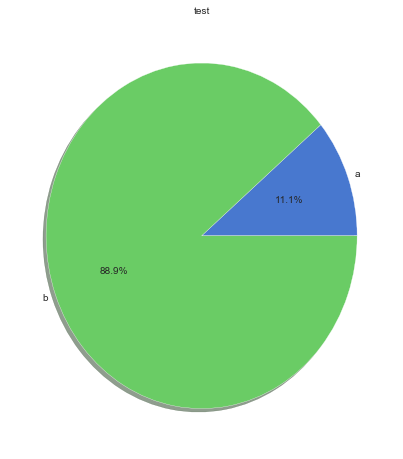

In [113]:
pic_pie([1,8],['a','b'],"test")

In [114]:
def get_switch_event_ckid_same(row,same=True):
    switch_evnet_num = 0
    type_ = list(row['type'])
    ckid = list(row['ckid'])
    time_stamp = list(row['timestamp'])
    for i in xrange(len(time_stamp) - 1):
        pre_type, next_type = type_[i], type_[i + 1]
        pre_ckid, next_ckid = ckid[i], ckid[i + 1]
        if same and pre_type != next_type and pre_ckid != next_ckid:
            switch_evnet_num +=1
        elif pre_type == next_type and pre_ckid != next_ckid:
            switch_evnet_num +=1
    return switch_evnet_num

In [115]:
gcol = 'mobile'

In [123]:
df.groupby(gcol).agg({"type":"nunique"}).reset_index()

,mobile,type
0,00012FD4E55B5A8876D11A0148F21D04,1
1,00019DA90A8D1518949DE693DE948116,1
2,00022BF496079DFC7C84BDA6D8B81B4E,1
3,00045072AC44A47B63D3BA70DD199254,1
4,000728351D19C36721E35846CAD934A6,1
5,00088F791F304F9A97A6B99FF5ABA984,1
6,00092FF5F6938FEFFBE981A36C40EAB8,1
7,00099AD98E786437801FB2384E86D050,1
8,000F4C307CDD3695232E9BB101D678CC,1
9,00120463BB446E206F5C6E0FFDD09276,1


In [148]:
df_same = df.groupby([gcol, 'type']).agg({"ckid":"nunique"}).reset_index()

In [149]:
df_same

,mobile,type,ckid
0,00012FD4E55B5A8876D11A0148F21D04,active,2
1,00019DA90A8D1518949DE693DE948116,active,4
2,00022BF496079DFC7C84BDA6D8B81B4E,active,3
3,00045072AC44A47B63D3BA70DD199254,active,1
4,000728351D19C36721E35846CAD934A6,active,1
5,00088F791F304F9A97A6B99FF5ABA984,active,1
6,00092FF5F6938FEFFBE981A36C40EAB8,active,1
7,00099AD98E786437801FB2384E86D050,active,1
8,000F4C307CDD3695232E9BB101D678CC,active,4
9,00120463BB446E206F5C6E0FFDD09276,active,1


In [150]:
df_same = df_same.loc[df_same['ckid'] > 1]

In [151]:
df_same = df.merge(df_same.drop(['ckid'],axis=1), on=['mobile','type'])

In [152]:
df_same

,city,ckid,country,country_code,ip,is_cracked,is_proxy,is_simulator,mobile,province,timestamp,type,ua_mismatch
0,UNKNOWN,2b4f740bbb771887,中国,CHN,222.217.87.58,False,UNKNOWN,True,91B45FC63F64B5608C888DBE64169CBC,广西壮族自治区,1507593638555,active,False
1,梧州市,2b4f740bbb771887,中国,CHN,117.181.249.202,False,UNKNOWN,True,91B45FC63F64B5608C888DBE64169CBC,广西壮族自治区,1507825341810,active,False
2,UNKNOWN,2b4f740bbb771887a,中国,CHN,222.217.87.58,False,False,UNKNOWN,91B45FC63F64B5608C888DBE64169CBC,广西壮族自治区,1508260764804,active,False
3,UNKNOWN,2b4f740bbb771887a,中国,CHN,223.104.90.39,False,False,UNKNOWN,91B45FC63F64B5608C888DBE64169CBC,广西壮族自治区,1508406910362,active,False
4,UNKNOWN,2b4f740bbb771887a,中国,CHN,223.104.90.118,False,False,UNKNOWN,91B45FC63F64B5608C888DBE64169CBC,广西壮族自治区,1508648355630,active,False
5,UNKNOWN,2b4f740bbb771887aaa,中国,CHN,223.104.91.130,False,False,UNKNOWN,91B45FC63F64B5608C888DBE64169CBC,广西壮族自治区,1509545864547,active,False
6,UNKNOWN,2b4f740bbb771887aaa,中国,CHN,223.104.22.175,False,False,UNKNOWN,91B45FC63F64B5608C888DBE64169CBC,广西壮族自治区,1509844640517,active,False
7,UNKNOWN,2b4f740bbb771887aaa,中国,CHN,223.104.90.42,False,False,UNKNOWN,91B45FC63F64B5608C888DBE64169CBC,广西壮族自治区,1509942413030,active,False
8,UNKNOWN,2b4f740bbb771887aaaaa,中国,CHN,223.104.90.35,False,False,UNKNOWN,91B45FC63F64B5608C888DBE64169CBC,广西壮族自治区,1510948771063,active,False
9,UNKNOWN,2b4f740bbb771887aaaaa,中国,CHN,223.104.22.129,False,False,UNKNOWN,91B45FC63F64B5608C888DBE64169CBC,广西壮族自治区,1511137556289,active,False


In [153]:
df_same=df_same.groupby(gcol).apply(lambda x: get_switch_event_ckid_same(x)).reset_index(name='same')

In [154]:
df_same.loc[df_same.same > 0]

,mobile,same
0,00012FD4E55B5A8876D11A0148F21D04,1
1,00019DA90A8D1518949DE693DE948116,3
2,00022BF496079DFC7C84BDA6D8B81B4E,2
3,000F4C307CDD3695232E9BB101D678CC,3
4,0013D16BC5FBE437B396846EF7378531,3
5,00156600F9F69BB10B27F48430B37E8A,1
6,00182C98457CF04468CACADFC339FAB3,1
7,001B63208701A17D8E01463DD1511677,1
8,001BF37A1D6A006412C046FF5AF0A69D,1
9,001F3F5F06EB30EE691F4F2C3AF8E94E,3


In [156]:
df_not_same = df.groupby(gcol).agg({"type":"nunique"}).reset_index()
df_not_same = df_not_same.loc[df_not_same['type'] > 1]
df_not_same = df.merge(df_not_same.drop(['type'],axis=1), on='mobile')


In [157]:
df_not_same

,city,ckid,country,country_code,ip,is_cracked,is_proxy,is_simulator,mobile,province,timestamp,type,ua_mismatch


In [161]:
df['ip'].apply(lambda x : ".".join(x.split(".")[:2])).shape

(124687,)

In [166]:
df['ip']

50772       222.217.87.58
50773        61.55.93.154
50774       14.30.180.124
50775       182.124.79.68
50776       125.73.102.27
50777      123.178.32.137
50778       112.224.20.54
50779     121.206.194.175
50780        171.10.49.38
50781      113.200.85.175
50782       117.136.41.82
50783       101.130.53.45
50784      112.96.128.119
107333      14.16.132.147
107334      223.104.16.48
107335     60.161.151.203
107336     27.184.136.164
107337      36.104.34.151
107338    113.129.224.152
107339     211.94.254.149
107340      218.76.207.35
93460        58.62.235.94
93461       14.205.79.248
93462       182.128.8.132
93463      171.217.18.183
93464     119.103.185.153
93465       223.104.2.199
93466       36.149.70.122
93467       223.104.25.89
93468      220.168.13.117
               ...       
960         27.153.182.53
961         111.128.4.194
962       171.221.129.226
963         61.158.149.35
49160       117.152.65.18
49161      124.164.205.71
49162       222.160.0.208
49163     10

In [164]:
df['ip_c'] = df['ip'].apply(lambda x : ".".join(x.split(".")[:2]))

In [165]:
df['ip_c']

50772     222.217
50773       61.55
50774       14.30
50775     182.124
50776      125.73
50777     123.178
50778     112.224
50779     121.206
50780      171.10
50781     113.200
50782     117.136
50783     101.130
50784      112.96
107333      14.16
107334    223.104
107335     60.161
107336     27.184
107337     36.104
107338    113.129
107339     211.94
107340     218.76
93460       58.62
93461      14.205
93462     182.128
93463     171.217
93464     119.103
93465     223.104
93466      36.149
93467     223.104
93468     220.168
           ...   
960        27.153
961       111.128
962       171.221
963        61.158
49160     117.152
49161     124.164
49162     222.160
49163     101.247
49164      222.93
49165     211.161
49166      27.202
49167     223.104
49168       116.8
49169     111.167
49170     117.136
49171      171.82
105216    183.246
105217     171.10
105218       36.5
105219     222.63
105220     124.94
105221    113.247
105222    117.136
105223     14.120
73468     

In [167]:
acol = 'ckid'
gcol ='ip'

In [ ]:
df1 = df.groupby(gcol).agg({acol:"nunique"}).reset_index()
    df1 = df1.rename({acol:all_acol_name})
    df2 = df.loc[df[fcol] == True]
    df2 = df2.groupby(gcol).agg({acol:"nunique"}).reset_index()